# 第3章 Pytorch 基本开发步骤——用逻辑回归拟合二维数据

In [1]:
# P20 3.1 实例1：从一组看似混乱的数据中找出规律
# 数据集生成
#load the required library
import sklearn.datasets
import torch
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


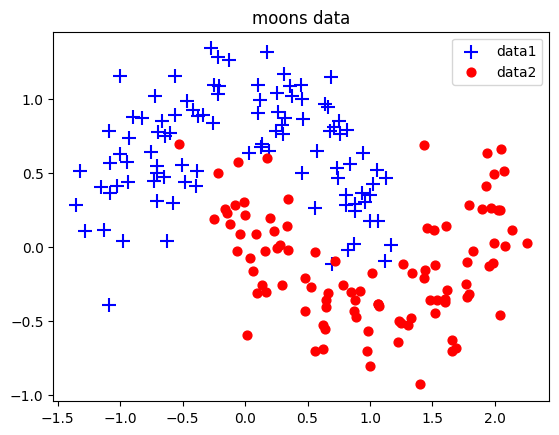

In [2]:
np.random.seed(0)
X, Y = sklearn.datasets.make_moons(200, noise=0.2)
# X为数据的二维特征，y为标签属性

arg = np.squeeze(np.argwhere(Y==0), axis = 1) #获取第1组索引
# np.squeeze 将其合并为一行向量
arg2 = np.squeeze(np.argwhere(Y==1), axis = 1) #获取第二组索引

plt.title("moons data")
plt.scatter(X[arg,0], X[arg, 1], s=100, c='b',marker='+',label='data1')
plt.scatter(X[arg2,0],X[arg2,1],s=40,c='r',marker='o',label='data2')
plt.legend()
plt.show()

In [3]:
# 定义网络模型 LogicNet
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
class LogicNet(nn.Module): ##继承nn.Module类，构建网络模型
    def __init__(self,inputdim,hiddendim,outputdim):
        super(LogicNet,self).__init__()
        self.Linear1 = nn.Linear(inputdim,hiddendim) #定义全连接层
        self.Linear2 = nn.Linear(hiddendim, outputdim) #定义全连接层
        self.criterion = nn.CrossEntropyLoss() #定义交叉熵函数
    def forward(self, x):
        x = self.Linear1(x) #输入送入到第一个全连接层
        x = torch.tanh(x) #对第一个全连接层的结果进行非线性变换
        x = self.Linear2(x)
        return x
    def predict(self, x): #模型的预测接口
        pred = torch.softmax(self.forward(x), dim=1)
        return torch.argmax(pred, dim=1)
    def getloss(self,x,y):
        y_pred = self.forward(x)
        loss = self.criterion(y_pred,y)
        return loss      

In [4]:
model = LogicNet(inputdim=2,hiddendim=3,outputdim=2) #模型的最终结果有多少个分类，该参数就设置成多少
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [5]:
#训练模型
xt = torch.from_numpy(X).type(torch.FloatTensor) #将数据转换为张量
yt = torch.from_numpy(Y).type(torch.LongTensor)
epochs = 1000
losses = []
for i in range(epochs):
    loss = model.getloss(xt, yt)
    losses.append(loss.item())
    optimizer.zero_grad() #清空之前的梯度
    loss.backward() #反向传播损失值
    optimizer.step() #更新参数

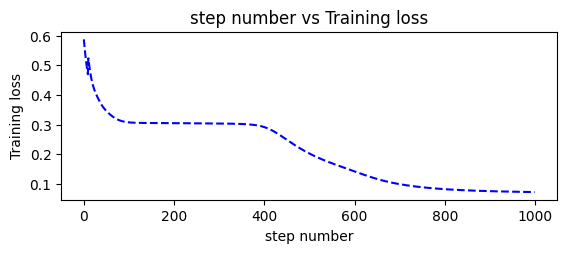

In [6]:
#求移动平均值， 不足w个数当前值作为平均值，之后每w个求该窗口内的平均值
def moving_average(a, w=10):
    if len(a) <w:
       return a[:]
    return [val if idx<w else sum(a[idx-w:idx])/w for idx,val in enumerate(a)]
def plot_losses(losses):
    avgloss = moving_average(losses) #获得损失值的移动平均值
    plt.figure(1)
    plt.subplot(211)
    plt.plot(range(len(avgloss)), avgloss, 'b--')
    plt.xlabel('step number')
    plt.ylabel('Training loss')
    plt.title('step number vs Training loss')
    plt.show()
plot_losses(losses)

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(xt),yt))

0.975


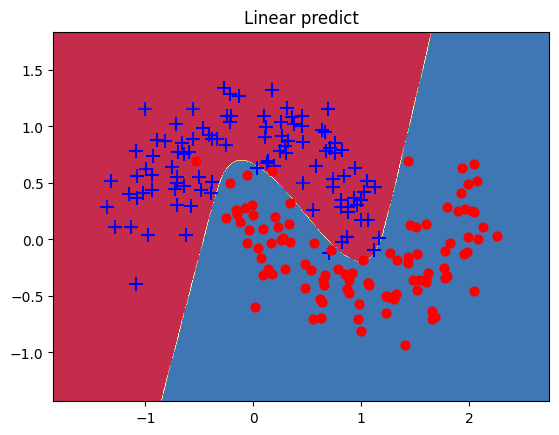

In [8]:
def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

#可视化预测结果模型
def plot_decision_boundary(pred_func, X, Y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    #在坐标系中采用数据，生成网格矩阵，用于输入模型
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #将数据输入并进行预测
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])

 
    Z = Z.reshape(xx.shape)
    #将预测的结果可视化
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.title("Linear predict")
    arg = np.squeeze(np.argwhere(Y==0),axis = 1)
    arg2 = np.squeeze(np.argwhere(Y==1),axis = 1)
    plt.scatter(X[arg,0], X[arg,1], s=100,c='b',marker='+')
    plt.scatter(X[arg2,0], X[arg2,1],s=40, c='r',marker='o')
    plt.show()
plot_decision_boundary(lambda x:predict(x), xt, yt)
    